# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Basic pandas and numpy
import pandas as pd
import numpy as np
 
# Basic visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Actually, there are some values expressed in €M and others in €K. I create a new column to get the correct values

In [5]:
def tonum(s):
    if 'M' in s:
        return float(s.replace('€', '').replace('M', ''))*1000000
    elif 'K' in s:
        return float(s.replace('€', '').replace('K', ''))*1000

In [6]:
fifa['Value_Numeric'] = fifa.Value.map(tonum)

In [7]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Value_Numeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [8]:
# H0: No differences among groups.
# H1: Differences among groups.

In [9]:
# Dropping nan values on Value_Numeric for adequate analysis:
fifa = fifa.dropna(subset=['Value_Numeric']) 

In [10]:
# Changing column names:
fifa.columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred_Foot', 'Position', 'Weak_Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Value_Numeric']

In [11]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore_lm = ols('Value_Numeric ~ C(Preferred_Foot)*C(Position)', data=fifa).fit()
table = sm.stats.anova_lm(moore_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
C(Preferred_Foot),2.316461e+14,1.0,7.570476,5.939195e-03
C(Position),1.659610e+16,26.0,20.860790,2.309558e-96
C(Preferred_Foot):C(Position),5.182140e+15,26.0,6.513793,7.422724e-23
Residual,5.462771e+17,17853.0,NaN,NaN


What is your conclusion from this ANOVA?

In [12]:
# Your conclusions here:
# H0 is rejected for all the postulations

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [13]:
# Your code here:
moore_lm = ols('Value_Numeric ~ C(Nationality)', data=fifa).fit()
table = sm.stats.anova_lm(moore_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
C(Nationality),3.283265e+16,162.0,6.732612,2.370904e-132
Residual,5.355897e+17,17792.0,NaN,NaN


In [14]:
# Your conclusions here:
# H0 is rejected. There are no differences depending on Nationality

What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [15]:
# Deleting rows with nan values:
fifa = fifa[pd.notnull(fifa.Club)]
fifa = fifa[pd.notnull(fifa.Position)]

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [16]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred_Foot,Position,Weak_Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Value_Numeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


In [17]:
from scipy.stats import linregress
import statsmodels.api as sm

X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']]) # We must add the intercept using the add_constant function
Y = fifa.Value_Numeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          Value_Numeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     452.2
Date:                Fri, 06 Sep 2019   Prob (F-statistic):          2.64e-192
Time:                        17:58:54   Log-Likelihood:            -3.0332e+05
No. Observations:               17907   AIC:                         6.066e+05
Df Residuals:                   17904   BIC:                         6.067e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.072e+06   1.97e+05    -15.576      

/home/eiroamd/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [18]:
# F-statistic
# R-squared quite close to 0, so the model is not very good for predicting value based on stamina and speed

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [19]:
X = sm.add_constant(fifa.Potential) # We must add the intercept using the add_constant function
Y = fifa.Value_Numeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:          Value_Numeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9073.
Date:                Fri, 06 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:58:54   Log-Likelihood:            -3.0009e+05
No. Observations:               17907   AIC:                         6.002e+05
Df Residuals:                   17905   BIC:                         6.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.552e+07      4e+05    -88.778      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [20]:
# R-squared quite close to 0, so the model is not very good for predicting value variation based on stamina and speed

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

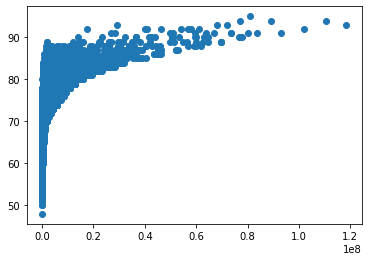

In [21]:
# Your code here:
plt.scatter(x=fifa.Value_Numeric, y=fifa.Potential)

In [22]:
# Relationship not really linear. More like a logarithmic relationship.